# pH-beregninger med programmering

__Biblioteker i Python kan inneholde mye nyttig. Vi benytter samlepakken pylab til blant annet matematikk, plotting og datahåndtering. Et annet nyttig bibliotek er pHcalc, som kan brukes til å gjøre pH-beregninger i vannløsninger.__ 
<div class="alert alert-block alert-info">
    <b>NB!</b> Fordi innstillingene i Skoleplattform Oslo ikke lar oss innstallere pHcalc på noen enkel måte, må vi kjøre dette programmet på en virtuell server eksternt. 
</div>

## 1. pH-beregninger

Vi kan beregne pH-en i både sterke og svake syrer ved hjelp av funksjoner i pHcalc-biblioteket. Vi definerer først et ion som i seg selv enten er surt, basisk eller nøytralt. Vi angir ladningen og konsentrasjonen til dette ionet. Deretter setter vi opp en løsning med dette ionet. Det gjør vi ved å definere et system, som består av ionet og tilhørende [H+] og [OH-], som justeres automatisk. Funksjonen pHsolve beregner pH-verdien i systemet, som vi deretter kan få ut ved å kalle på funksjonen pH. Her ser vi to eksempler på hvordan vi kan beregne pH i løsninger av sterke syrer og baser:

In [1]:
from pylab import *
from pHcalc.pHcalc import Acid, Neutral, System

# pH i 0,1 M HNO3
# Konsentrasjon av OH^- og H3O^+ justeres automatisk
no3 = Neutral(charge=-1, conc=0.1) # Nitrat gir i seg selv nøytral løsning

system1 = System(no3)
system1.pHsolve()
print("pH i 0,1 M HNO3 er:", system1.pH)

# Base (0,01 M NaOH)
Na = Neutral(charge=1, conc=0.01) # Natrium gir i seg selv nøytral løsning
system2 = System(Na)
system2.pHsolve()
print("pH i 0,1 M NaOH er:", system2.pH)

pH i 0,1 M HNO3 er: 1.000001525878904
pH i 0,1 M NaOH er: 12.000002288818362


Dersom vi ønsker å beregne pH i svake syrer og baser, må vi spesifisere pKa for syra. Hvis syra er flerprotisk, lager vi en liste med syrekonstanter.

In [2]:
from pylab import *
from pHcalc.pHcalc import Acid, Neutral, System

# pH i  0,01 M KF
hf = Acid(Ka=6.76E-4, charge=0, conc=0.01)
k = Neutral(charge=1, conc=0.01)
system1 = System(hf, k)
system1.pHsolve()
print(system1.pH)

# 0,01 M H2CO3
karbonsyre = Acid(Ka=[2.51E-4, 4.79E-11], charge=0, conc=0.01)
system2 = System(karbonsyre)
system2.pHsolve()
print(system2.pH)

# Sammensatte systemer (her (NH4)3PO4)
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
nh4 = Acid(pKa=9.25, charge=1, conc=0.01*3)
system = System(phos, nh4)
system.pHsolve()
print(system.pH)

7.59922332763672
2.8345321655273423
8.95915298461914


## 2. Titrering

Dersom vi utfører pH-beregninger for flere verdier av tilsatt volum i en løsning, kan vi simulere en titrerkurve:



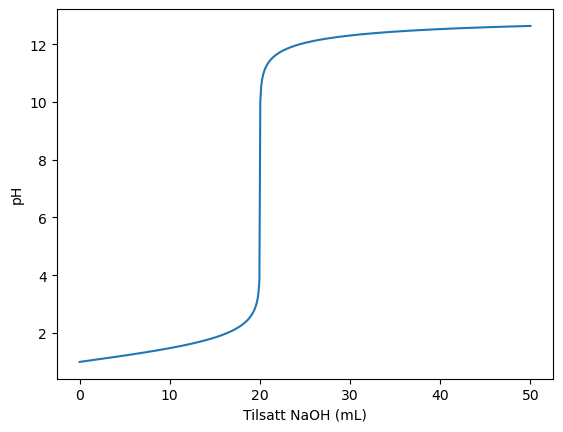

In [3]:
from pylab import *
from pHcalc.pHcalc import Acid, Neutral, System

# Titrering av 0.1 M HCl med NaOH
V_NaOH = linspace(0, 0.050, 500) # Volum i L
c_NaOH = 0.1 # mol/L
V_HCl = 0.020 # L
c_HCl = 0.1
n_HCl = c_HCl*V_HCl

phs = []
tilsatt_volum_NaOH = []

for volum in V_NaOH:
    V_total = V_HCl + volum # Totalvolum i prøveløsningen etter tilsatt base
    na = Neutral(charge=1, conc=(volum*c_NaOH)/(V_total)) # NaOH
    cl = Neutral(charge=-1, conc=n_HCl/V_total)           # HCl
    system = System(na, cl)
    system.pHsolve()
    phs.append(system.pH)
    tilsatt_volum_NaOH.append(volum*1000)
    
plot(tilsatt_volum_NaOH, phs)
xlabel("Tilsatt NaOH (mL)")
ylabel("pH")
show()

I programmet gjør vi følgende:

1. Definerer hvor mye NaOH vi skal tilsette gradvis. Her velger vi et volum mellom 0 og 50 mL, som vi tilsetter gradvis med 500 «dråper».

2. Definerer konsentrasjonen og volumet til syra og basen, og regner ut stoffmengden til syra. Merk at vi ikke kan ha ukjent konsentrasjon av en syre her, som i en virkelig titrering.

3. I løkka tilsetter vi gradvis et volum NaOH, som vi legger til volumet av titranten (syra).

4. Så definerer vi systemet. Legg merke til hvordan vi må beregne konsentrasjonen hver gang. Det kan være en fin oppgave i støkiometri å be elevene fylle inn konsentrasjonsberegningen for NaOH og HCl selv.

5. Deretter beregnes pH-en ved tilsatt volum, og løkka («byretten») fortsetter med å legge til mer NaOH.

6. Til slutt plotter vi titrerkurven.

Slike simuleringer kan brukes til å estimere titrerkurver, for eksempel før elevene gjør en titrering. Eller det kan brukes til å lage mange ulike titrerkurver for ulike systemer, og utforske disse systemene.

__Kilder: Dette opplegget er hentet fra digitale ressurser for Kjemi 1 og Kjemi 2 i Aunivers utgitt av Aschehoug forlag A/S.__